### Задание 1

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]
1.	Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2.	Является ли значимым получившееся уравнение регрессии?

In [1]:
import pandas as pd
import numpy as np

In [2]:
X = pd.DataFrame([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214], [-0.18757272, 1.30337355, 5.12093014, 3.46363202], [-0.81094525, 1.82463398, 5.79686488, 1.86159445], [ 0.75129018, 2.67392052, 3.65529809, 1.66746094], [ 0.00972362, 1.97367255, 2.50594319, 1.69755173], [-0.62972637, 0.77750764, 2.84124027, 4.54410559], [ 2.29536229, 1.81206697, 1.95026215, 1.51874636], [ 0.0920418 , 2.26971361, 7.47708735, 2.61081203], [ 2.39252799, 3.17563985, 3.61420599, 5.10773362], [ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
X

,0,1,2,3
0,1.224013,2.308685,3.036364,2.692872
1,-0.187573,1.303374,5.120930,3.463632
2,-0.810945,1.824634,5.796865,1.861594
3,0.751290,2.673921,3.655298,1.667461
4,0.009724,1.973673,2.505943,1.697552
5,-0.629726,0.777508,2.841240,4.544106
6,2.295362,1.812067,1.950262,1.518746
7,0.092042,2.269714,7.477087,2.610812
8,2.392528,3.175640,3.614206,5.107734
9,0.549838,2.879887,1.657528,1.596360


In [3]:
y = pd.DataFrame([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])
y

,0
0,9.261934
1,9.700363
2,8.672148
3,8.747970
4,6.186891
5,7.533127
6,7.576438
7,12.449655
8,14.290107
9,6.683612


#### 1.

Из 4-х имеющихся признаков, можно получить следующие сочетания по 2-а признака:

- x0_1
- x0_2
- x0_3
- x1_2
- x1_3
- x2_3

In [4]:
x0_1, x0_2, x0_3, x1_2, x1_3, x2_3 = X[[0, 1]], X[[0, 2]], X[[0, 3]], X[[1, 2]], X[[1, 3]], X[[2, 3]]

x0_1, x0_2, x0_3, x1_2, x1_3, x2_3

(          0         1
 0  1.224013  2.308685
 1 -0.187573  1.303374
 2 -0.810945  1.824634
 3  0.751290  2.673921
 4  0.009724  1.973673
 5 -0.629726  0.777508
 6  2.295362  1.812067
 7  0.092042  2.269714
 8  2.392528  3.175640
 9  0.549838  2.879887,
           0         2
 0  1.224013  3.036364
 1 -0.187573  5.120930
 2 -0.810945  5.796865
 3  0.751290  3.655298
 4  0.009724  2.505943
 5 -0.629726  2.841240
 6  2.295362  1.950262
 7  0.092042  7.477087
 8  2.392528  3.614206
 9  0.549838  1.657528,
           0         3
 0  1.224013  2.692872
 1 -0.187573  3.463632
 2 -0.810945  1.861594
 3  0.751290  1.667461
 4  0.009724  1.697552
 5 -0.629726  4.544106
 6  2.295362  1.518746
 7  0.092042  2.610812
 8  2.392528  5.107734
 9  0.549838  1.596360,
           1         2
 0  2.308685  3.036364
 1  1.303374  5.120930
 2  1.824634  5.796865
 3  2.673921  3.655298
 4  1.973673  2.505943
 5  0.777508  2.841240
 6  1.812067  1.950262
 7  2.269714  7.477087
 8  3.175640  3.614206
 9  2.87

In [5]:
y_check = y[0]
y_check

0     9.261934
1     9.700363
2     8.672148
3     8.747970
4     6.186891
5     7.533127
6     7.576438
7    12.449655
8    14.290107
9     6.683612
Name: 0, dtype: float64

In [6]:
ones0_1 = np.ones((x0_1.shape[0], 1))
x0_1 = np.hstack((ones0_1, x0_1))

ones0_2 = np.ones((x0_2.shape[0], 1))
x0_2 = np.hstack((ones0_2, x0_2))

ones0_3 = np.ones((x0_3.shape[0], 1))
x0_3 = np.hstack((ones0_3, x0_3))

ones1_2 = np.ones((x1_2.shape[0], 1))
x1_2 = np.hstack((ones1_2, x1_2))

ones1_3 = np.ones((x1_3.shape[0], 1))
x1_3 = np.hstack((ones1_3, x1_3))

ones2_3 = np.ones((x2_3.shape[0], 1))
x2_3 = np.hstack((ones2_3, x2_3))

x0_1, x0_2, x0_3, x1_2, x1_3, x2_3

(array([[ 1.        ,  1.22401313,  2.30868478],
        [ 1.        , -0.18757272,  1.30337355],
        [ 1.        , -0.81094525,  1.82463398],
        [ 1.        ,  0.75129018,  2.67392052],
        [ 1.        ,  0.00972362,  1.97367255],
        [ 1.        , -0.62972637,  0.77750764],
        [ 1.        ,  2.29536229,  1.81206697],
        [ 1.        ,  0.0920418 ,  2.26971361],
        [ 1.        ,  2.39252799,  3.17563985],
        [ 1.        ,  0.54983815,  2.87988651]]),
 array([[ 1.        ,  1.22401313,  3.03636353],
        [ 1.        , -0.18757272,  5.12093014],
        [ 1.        , -0.81094525,  5.79686488],
        [ 1.        ,  0.75129018,  3.65529809],
        [ 1.        ,  0.00972362,  2.50594319],
        [ 1.        , -0.62972637,  2.84124027],
        [ 1.        ,  2.29536229,  1.95026215],
        [ 1.        ,  0.0920418 ,  7.47708735],
        [ 1.        ,  2.39252799,  3.61420599],
        [ 1.        ,  0.54983815,  1.65752765]]),
 array([[ 1.    

In [7]:
XTX0_1 = x0_1.T.dot(x0_1)
XTX0_2 = x0_2.T.dot(x0_2)
XTX0_3 = x0_3.T.dot(x0_3)
XTX1_2 = x1_2.T.dot(x1_2)
XTX1_3 = x1_3.T.dot(x1_3)
XTX2_3 = x2_3.T.dot(x2_3)

np.linalg.det(XTX0_1), np.linalg.det(XTX0_2), np.linalg.det(XTX0_3), np.linalg.det(XTX1_2), np.linalg.det(XTX1_3), np.linalg.det(XTX2_3)

(349.7782033818856,
 2835.3600226240915,
 1689.2124743606066,
 1427.812577608152,
 701.7327364453164,
 4547.328074863321)

Определители матриц не близки к нулю, поэтому проблем с методом нет.

In [8]:
XTX0_1_inv = np.linalg.inv(XTX0_1)
XTX0_2_inv = np.linalg.inv(XTX0_2)
XTX0_3_inv = np.linalg.inv(XTX0_3)
XTX1_2_inv = np.linalg.inv(XTX1_2)
XTX1_3_inv = np.linalg.inv(XTX1_3)
XTX2_3_inv = np.linalg.inv(XTX2_3)

b0_1 = XTX0_1_inv.dot(x0_1.T).dot(y_check)
b0_2 = XTX0_2_inv.dot(x0_2.T).dot(y_check)
b0_3 = XTX0_3_inv.dot(x0_3.T).dot(y_check)
b1_2 = XTX1_2_inv.dot(x1_2.T).dot(y_check)
b1_3 = XTX1_3_inv.dot(x1_3.T).dot(y_check)
b2_3 = XTX2_3_inv.dot(x2_3.T).dot(y_check)

print(f"{b0_1}\n{b0_2}\n{b0_3}\n{b1_2}\n{b1_3}\n{b2_3}")

[6.70781579 0.40786841 1.03360247]
[3.62455695 1.62531203 1.21134979]
[5.70686123 0.68359949 1.12650707]
[2.48896193 1.60611956 0.86269915]
[1.91685221 1.74373667 1.31971882]
[3.64001086 0.70753914 1.04851745]


Проверяем с помощью встроенных методов:

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model0_1 = LinearRegression().fit(x0_1, y_check)
model0_2 = LinearRegression().fit(x0_2, y_check)
model0_3 = LinearRegression().fit(x0_3, y_check)
model1_2 = LinearRegression().fit(x1_2, y_check)
model1_3 = LinearRegression().fit(x1_3, y_check)
model2_3 = LinearRegression().fit(x2_3, y_check)

model0_1.intercept_, model0_1.coef_, model0_2.intercept_, model0_2.coef_, model0_3.intercept_, model0_3.coef_, model1_2.intercept_, model1_2.coef_, model1_3.intercept_, model1_3.coef_, model2_3.intercept_, model2_3.coef_

(6.7078157904977385,
 array([0.        , 0.40786841, 1.03360247]),
 3.6245569493851146,
 array([0.        , 1.62531203, 1.21134979]),
 5.7068612323509935,
 array([0.        , 0.68359949, 1.12650707]),
 2.488961928568429,
 array([0.        , 1.60611956, 0.86269915]),
 1.916852207680499,
 array([0.        , 1.74373667, 1.31971882]),
 3.6400108599141863,
 array([0.        , 0.70753914, 1.04851745]))

Расчитываем коэффициент детерминации для каждого варианта:

In [11]:
z0_1 = x0_1.dot(b0_1)
z0_2 = x0_2.dot(b0_2)
z0_3 = x0_3.dot(b0_3)
z1_2 = x1_2.dot(b1_2)
z1_3 = x1_3.dot(b1_3)
z2_3 = x2_3.dot(b2_3)

In [12]:
sum_of_squares = ((y_check - y_check.mean()) ** 2).sum()

In [13]:
R2_0_1 = 1 - ((y_check - z0_1)**2).sum() / sum_of_squares
R2_0_2 = 1 - ((y_check - z0_2)**2).sum() / sum_of_squares
R2_0_3 = 1 - ((y_check - z0_3)**2).sum() / sum_of_squares
R2_1_2 = 1 - ((y_check - z1_2)**2).sum() / sum_of_squares
R2_1_3 = 1 - ((y_check - z1_3)**2).sum() / sum_of_squares
R2_2_3 = 1 - ((y_check - z2_3)**2).sum() / sum_of_squares

R2_0_1, R2_0_2, R2_0_3, R2_1_2, R2_1_3, R2_2_3

(0.18113594742585215,
 0.7634246238793152,
 0.45329667831440756,
 0.5479482734039012,
 0.6062055761129932,
 0.6224419876505322)

Таким образом максимальный уровень линейной зависимости целевой переменной $y$ получается от значений 2-х признаков (x0_2) -  $X[0]$ и $X[2]$.

#### 2.

In [14]:
k1_0_2 = x0_2.shape[1] - 1
k2_0_2 = x0_2.shape[0] - x0_2.shape[1] - 2

k1_0_2, k2_0_2

(2, 5)

Возьмём уровень значимости $\alpha = 0.05$. Квантиль считаем с помощью функции `scipy.stats.f.ppf`:

In [15]:
from scipy import stats

In [16]:
alpha = 0.05

t0_2 = stats.f.ppf(1 - alpha, k1_0_2, k2_0_2)
t0_2

5.786135043349964

Критическая область: $\Omega_\alpha = \left( 5.786135043349964, \infty \right)$

In [17]:
F_0_2 = (R2_0_2 / k1_0_2) / ((1 - R2_0_2) / k2_0_2)
F_0_2

8.067456516373321

Статистика попала в критическую область, поэтому уравнение регрессии признаётся значимым.

In [18]:
import statsmodels.api as sm
model = sm.OLS(y_check, x0_2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     11.29
Date:                Mon, 18 Jul 2022   Prob (F-statistic):            0.00644
Time:                        15:41:09   Log-Likelihood:                -15.767
No. Observations:                  10   AIC:                             37.53
Df Residuals:                       7   BIC:                             38.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6246      1.261      2.875      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Задание 2

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации

In [19]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#### 1.

Коэффициенты линейной регрессии по формулам для парной регрессии:

In [20]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b0 = np.mean(scoring) - b1 * np.mean(salary)

b0, b1

(444.1773573243596, 2.620538882402765)

Коэффициенты линейной регрессии с помощью метода наименьших квадратов:

In [21]:
salary_2 = pd.DataFrame([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring_2 = pd.DataFrame([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [22]:
ones = np.ones((salary_2.shape[0], 1))
salary_2 = np.hstack((ones, salary_2))

In [23]:
XTX = salary_2.T.dot(salary_2)

In [24]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(salary_2.T).dot(scoring_2)

print(b)

[[444.17735732]
 [  2.62053888]]


#### 2.

In [25]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

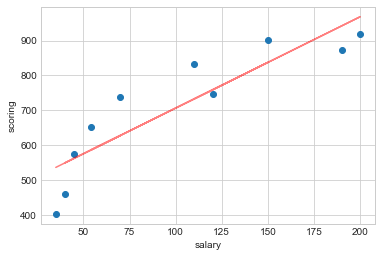

In [26]:
x = salary
y = b0 + b1 * x

plt.scatter(salary, scoring)
plt.plot(x, y, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

#### 3.

Коэффициент детерминации:

In [27]:
z = b0 + b1 * salary

In [28]:
sum_of_squares_scoring = ((scoring - scoring.mean()) ** 2).sum()

In [29]:
R = 1 - ((scoring - z)**2).sum() / sum_of_squares_scoring
R

0.7876386635293686

#### 4.

In [30]:
k1 = 1
k2 = salary.shape[0] - 2

k1, k2

(1, 8)

Возьмём уровень значимости $\alpha = 0.05$. Критическая область:

In [31]:
t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [32]:
F = (R / k1) / ((1 - R) / k2)
F

29.67164085966451

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

#### 5.

Средняя ошибка аппроксимации:

In [33]:
np.abs((scoring - z) / scoring).mean()

0.11469251843561709

Средняя ошибка аппроксимации превышает 8−10%, поэтому можно сказать, что теоретические значения не близки к тем, которые выдает модель линейной регрессии.